<a href="https://colab.research.google.com/github/Karthikeya914/Spam_Classifier_App/blob/main/Spam_Classifier_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/spam.csv',encoding='latin1')
df.head()
df.isna().sum()
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()
df.columns=['mail','text']
df.head()
df['mail'] = df['mail'].map({'ham':0,'spam':1})
df.head()
df[df.duplicated()==True]
df = df.drop_duplicates(keep='first')

df.duplicated().sum()
df.isna().sum()
df.head()
df['mail'].value_counts(normalize=True)*100

,proportion
mail,
0,87.366996
1,12.633004


In [ ]:
df.head()

,mail,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sents'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,mail,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Analysis of HAM messages
df[df['mail']==0][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Analysis of SPAM messages
df[df['mail']==1][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("HII kArthikeya, JBD 207&&8 how is it going" )

'hii karthikeya jbd 207 8 go'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,mail,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['mail'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [ ]:
ham_corpus = []
for msg in df[df['mail']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus)

35404

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(100)


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106),
 ('miss', 106),
 ('happi', 104),
 ('give', 102),
 ('later', 100),
 ('hey', 100),
 ('great', 97),
 ('na', 96),
 ('wait', 96),
 ('way', 95),
 ('alreadi', 90),
 ('thank', 87),
 ('let', 86),
 ('yeah', 86),
 ('text', 85),
 ('feel', 83),
 ('re

In [ ]:
df.head()

,mail,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF object
tfidf = TfidfVectorizer(max_features=3000)

# Apply TF-IDF to 'text_final' (which should be space-separated tokens)
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Labels
y = df['mail'].values

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ste4 : Training the Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Step 6: Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

# Model exporting

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(nb, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Downloading files

from google.colab import files

files.download('model.pkl')
files.download('vectorizer.pkl')

Accuracy: 0.9718992248062015
Confusion Matrix:
 [[909   0]
 [ 29  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       909
           1       1.00      0.76      0.87       123

    accuracy                           0.97      1032
   macro avg       0.98      0.88      0.93      1032
weighted avg       0.97      0.97      0.97      1032

Precision 1.0
Recall 0.7642276422764228


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def predict_spam(message):
    transformed_text = transform_text(message)
    vector = tfidf.transform([transformed_text]).toarray()
    prob = nb.predict_proba(vector)[0][1]
    return f"🚨 Spam (P={prob:.3f})" if prob > 0.5 else f"✅ Ham (P={prob:.3f})"

In [ ]:
# what is recall
# out of all actual spam messages how many did you predict correctly
# what is precision
# out of all messages which are predicted as spam how many did you do correctly

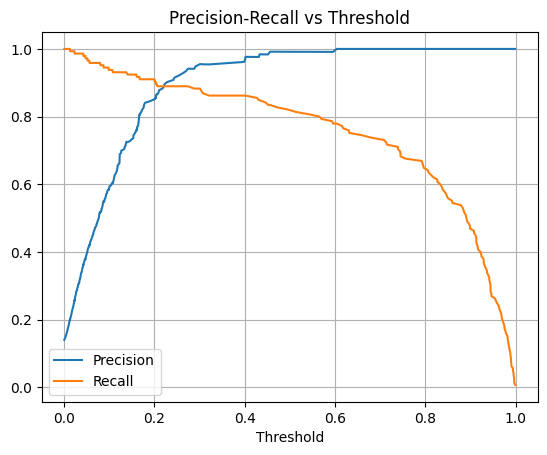

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, nb.predict_proba(X_test)[:,1])

# Plot to find best threshold for your tradeoff
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.title('Precision-Recall vs Threshold')
plt.show()

In [ ]:
print(predict_spam("HI am karthikeya"))

✅ Ham (P=0.033)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>